## Predictive Maintenance of Equipment

In industries where machinery and equipment are at the heart of operations—like manufacturing, utilities, mining, and logistics—unexpected breakdowns can lead to significant downtime, production delays, safety hazards, and increased operational costs. This project addresses that challenge by leveraging machine learning to build a predictive maintenance system that can anticipate equipment failures before they happen.

Using historical sensor and failure data, this notebook walks through the full data science pipeline: from loading and preprocessing the data, to feature engineering, model training, evaluation, and real-world deployment examples. The goal is to help businesses shift from reactive or scheduled maintenance to a smarter, data-driven approach—one that minimizes unnecessary servicing and maximizes equipment uptime.

Whether you’re a plant manager trying to reduce downtime, a data scientist exploring industrial AI applications, or a stakeholder evaluating the ROI of predictive analytics, this project demonstrates how machine learning can play a critical role in improving operational efficiency and decision-making.

## 1. Load and Inspect Dataset

The first step in any machine learning project is to understand the data you're working with. In this section, we load the equipment dataset, which includes sensor readings, device identifiers, timestamps, and a binary target variable indicating whether a failure occurred.

This early inspection helps identify:
- The structure and dimensionality of the dataset
- Data types for each column
- Potential issues like missing values or incorrect formats
- The overall shape and content of the data

By previewing the dataset, we can start forming hypotheses about which features might influence equipment failure and prepare for effective preprocessing in the next steps.


In [19]:
import pandas as pd

# Load the dataset
file_path = 'predictive_maintenance_dataset.csv'  # Update this path if necessary
df = pd.read_csv(file_path)

# Show basic info and preview
print("Data Information:")
df.info()

print("\nFirst 5 Rows:")
df.head()


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124494 non-null  object
 1   device   124494 non-null  object
 2   failure  124494 non-null  int64 
 3   metric1  124494 non-null  int64 
 4   metric2  124494 non-null  int64 
 5   metric3  124494 non-null  int64 
 6   metric4  124494 non-null  int64 
 7   metric5  124494 non-null  int64 
 8   metric6  124494 non-null  int64 
 9   metric7  124494 non-null  int64 
 10  metric8  124494 non-null  int64 
 11  metric9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB

First 5 Rows:


,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/2015,S1F01085,0,215630672,55,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


## 2. Check for Missing Values

Before diving into model training, it's essential to verify the quality of the data. Missing or null values can introduce bias, reduce model accuracy, or even break certain algorithms altogether.

In this section, we perform a simple check to identify missing values across all columns. If any are found, they will need to be handled—either by imputing, removing, or flagging—depending on the context and amount of missing data.

This step ensures we start with a clean and reliable dataset for analysis and modeling.


In [20]:
# Check for missing values in each column
missing_values = df.isnull().sum()

print("Missing Values per Column:")
print(missing_values)


Missing Values per Column:
date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64


## 3. Feature Engineering and Preprocessing

To train an effective predictive model, the dataset needs to be structured in a way that helps the algorithm learn meaningful patterns. This section covers several critical preprocessing steps:

- **Scaling numeric features** to ensure all variables contribute equally to the model.
- **Parsing datetime information** to create time-related features such as hour, day, or time since last event.
- **Combining all cleaned features** into a single dataframe ready for model training.

Good feature engineering can significantly improve model performance by surfacing relationships that aren’t obvious in raw data.


In [21]:
from sklearn.preprocessing import StandardScaler

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Identify numeric columns (excluding target)
numeric_columns = df.select_dtypes(include=['int64', 'float64']).drop(columns=['failure'], errors='ignore').columns

# Scale numeric features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns])
scaled_df = pd.DataFrame(scaled_data, columns=numeric_columns)

# Add back essential non-numeric features
scaled_df['date'] = df['date']
scaled_df['device'] = df['device']
scaled_df['failure'] = df['failure']

# Create new time-based features
scaled_df['hour'] = df['date'].dt.hour
scaled_df['day'] = df['date'].dt.day
scaled_df['weekday'] = df['date'].dt.weekday
scaled_df['month'] = df['date'].dt.month

# Display the first few rows of the processed dataset
scaled_df.head()


,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,date,device,failure,hour,day,weekday,month
0,1.323358,-0.047940,-0.053518,2.193905,-0.515755,1.485268,-0.039335,-0.039335,-0.021816,2015-01-01,S1F01085,0,0,1,3,1
1,-0.865998,-0.073173,-0.037367,-0.076004,-0.515755,1.442263,-0.039335,-0.039335,-0.047210,2015-01-01,S1F0166B,0,0,1,3,1
2,0.722517,-0.073173,-0.053518,-0.076004,-0.139414,-0.229738,-0.039335,-0.039335,-0.047210,2015-01-01,S1F01E6Y,0,0,1,3,1
3,-0.605942,-0.073173,-0.053518,-0.076004,-0.515755,1.512983,-0.039335,-0.039335,-0.047210,2015-01-01,S1F01JE0,0,0,1,3,1
4,0.192770,-0.073173,-0.053518,-0.076004,0.048757,0.534543,-0.039335,-0.039335,-0.036327,2015-01-01,S1F01R2B,0,0,1,3,1


## 4. Feature Selection using Correlation and Random Forest

Not all features contribute equally to predicting equipment failure. In this section, we identify the most relevant variables by using two approaches:

1. **Correlation Analysis**: Measures how strongly each feature is related to the target variable (`failure`). This is helpful for quickly identifying linear relationships.
2. **Random Forest Feature Importance**: Evaluates the contribution of each feature in a trained Random Forest model. This is more robust because it captures both linear and non-linear interactions.

By focusing on the most influential features, we can improve model accuracy, reduce noise, and speed up training.


Correlation with 'failure':
failure    1.000000
metric7    0.119055
metric8    0.119055
metric4    0.067398
metric2    0.052901
day        0.002994
metric5    0.002270
metric1    0.001983
metric9    0.001067
month      0.000321
metric6   -0.000550
metric3   -0.000948
weekday   -0.012842
hour            NaN
Name: failure, dtype: float64


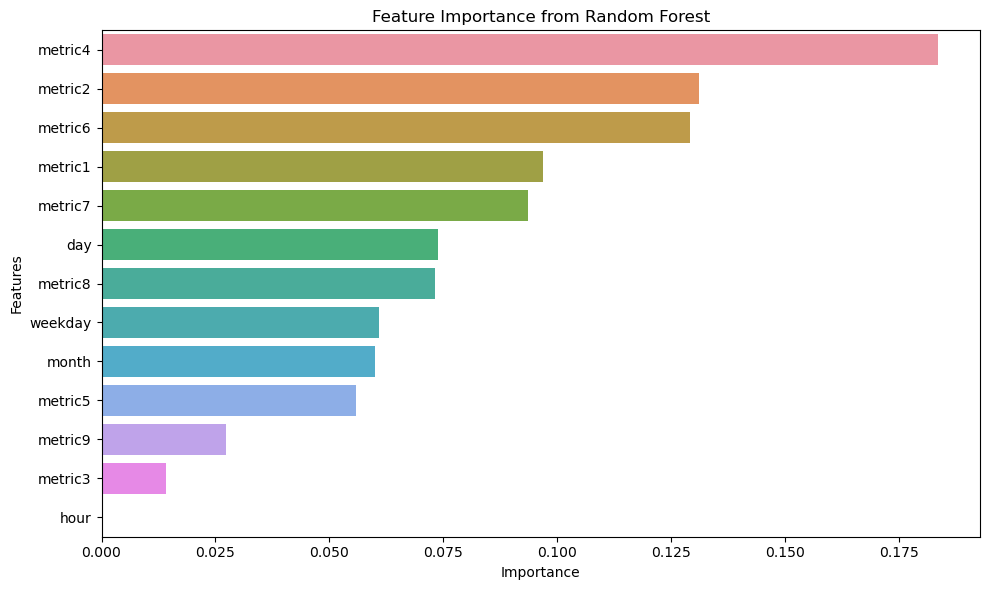

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Remove irrelevant columns
X = scaled_df.drop(columns=['failure', 'date', 'device'])
y = scaled_df['failure']

# Correlation with the target
correlation_matrix = scaled_df.select_dtypes(include='number').corr()
failure_corr = correlation_matrix['failure'].sort_values(ascending=False)

print("Correlation with 'failure':")
print(failure_corr)

# Train a random forest to evaluate feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X, y)

# Feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


## 5. Model Training and Evaluation

With the data cleaned and the most important features selected, we can now train a predictive model. In this section, we:

- Split the data into training and test sets
- Train a Random Forest classifier
- Evaluate the model using:
  - Accuracy
  - Precision, Recall, and F1-score
  - Confusion Matrix
  - ROC-AUC Curve

These metrics help us understand how well the model distinguishes between failing and non-failing equipment, and whether it's suitable for real-world deployment.


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24881
           1       0.00      0.00      0.00        18

    accuracy                           1.00     24899
   macro avg       0.50      0.50      0.50     24899
weighted avg       1.00      1.00      1.00     24899

Confusion Matrix:
[[24881     0]
 [   18     0]]
ROC AUC Score: 0.71


/Users/michaelt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michaelt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/michaelt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


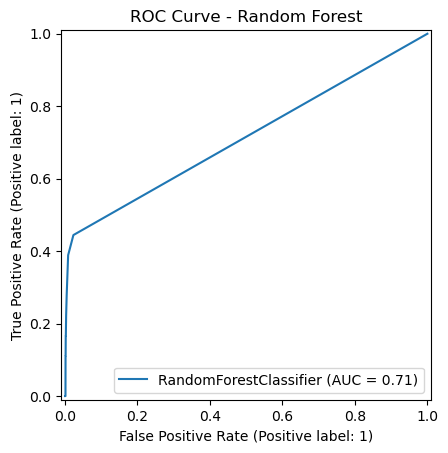

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")

# ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve - Random Forest")
plt.show()


## 6. Save Trained Model

Once the model is trained and evaluated, it's important to save it so it can be reused without retraining. This is especially useful for integrating the model into applications like dashboards or APIs.

In this step, we use the `joblib` library to serialize and save the trained Random Forest model. This saved model can later be loaded into a Streamlit app, a FastAPI service, or any other environment that needs to make predictions.


In [32]:
import joblib

# Save the trained model to disk
joblib.dump(model, 'predictive_maintenance_model.pkl')

print("Model saved as 'predictive_maintenance_model.pkl'")


Model saved as 'predictive_maintenance_model.pkl'


## 7. Business Applications and Conclusion

The predictive maintenance model built in this project has the potential to deliver real-world value across multiple industries. By identifying early warning signs of equipment failure, companies can:

- **Reduce unplanned downtime** by scheduling maintenance before breakdowns occur.
- **Optimize maintenance cycles** instead of relying on fixed schedules.
- **Extend equipment lifespan** through timely interventions.
- **Improve workplace safety** by preventing hazardous malfunctions.
- **Cut costs** related to emergency repairs and lost productivity.

### Industries That Can Benefit:
- **Manufacturing**: Prevent failures on assembly lines and machinery.
- **Energy & Utilities**: Monitor critical infrastructure like turbines and transformers.
- **Facilities Management**: Ensure uptime for HVAC, elevators, and safety systems.
- **Transportation & Logistics**: Monitor vehicle fleets and delivery equipment.

### Conclusion:
This project demonstrates a full machine learning pipeline—from raw data to actionable insights. The model can be integrated into real-time systems, monitored through dashboards, and used by decision-makers to keep operations running smoothly. By using predictive analytics, businesses can shift from reactive problem-solving to proactive decision-making.


## 8. Hyperparameter Tuning with GridSearchCV

Machine learning models like Random Forest have parameters that can be adjusted to improve performance. These are called **hyperparameters**, and tuning them correctly can lead to better generalization and accuracy.

In this section, we use `GridSearchCV` to search across combinations of parameters for:
- Number of trees (`n_estimators`)
- Maximum depth of each tree (`max_depth`)
- Minimum number of samples required to split a node (`min_samples_split`)

We use cross-validation to evaluate each combination and select the one that performs best based on F1-score.


In [33]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# Perform grid search
grid_search = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid,
    cv=3,
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score from CV:", grid_search.best_score_)

# Use best model from grid search
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best F1 Score from CV: 0.0686135628927391


## 9. Handling Imbalanced Data using SMOTE

In predictive maintenance, failures are often rare events—leading to class imbalance. If not addressed, this imbalance can cause the model to favor the majority class (no failure) and miss actual failures.

To fix this, we use **SMOTE (Synthetic Minority Over-sampling Technique)** to generate synthetic examples of the minority class (failures). This results in a more balanced training set and helps the model learn better patterns for detecting rare events.

After applying SMOTE, we retrain the model and evaluate it again.


In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a new model on the balanced data
smote_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
smote_model.fit(X_resampled, y_resampled)

# Evaluate on original test set
y_pred_resampled = smote_model.predict(X_test)

print("Classification Report after SMOTE:")
print(classification_report(y_test, y_pred_resampled))


Classification Report after SMOTE:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24881
           1       0.29      0.11      0.16        18

    accuracy                           1.00     24899
   macro avg       0.64      0.56      0.58     24899
weighted avg       1.00      1.00      1.00     24899



## 10. Model Logging using MLflow

As machine learning projects grow, keeping track of different models, hyperparameters, and metrics becomes essential. **MLflow** is a popular tool for tracking experiments, storing models, and managing versions.

In this section, we log:
- The trained Random Forest model
- Best hyperparameters from GridSearchCV
- The F1-score of the model

This allows us (and our team) to reproduce results, compare model performance, and deploy the right version confidently.


In [35]:
import mlflow
import mlflow.sklearn

# Start an MLflow run and log the model and metrics
with mlflow.start_run():
    mlflow.sklearn.log_model(smote_model, "random_forest_model")
    mlflow.log_params(grid_search.best_params_)
    mlflow.log_metric("f1_score", grid_search.best_score_)
    print("Model and metrics logged to MLflow.")


Model and metrics logged to MLflow.


/Users/michaelt/anaconda3/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


## 11. Streamlit App (Deployment Interface)

To make the predictive maintenance model accessible to non-technical users, we can build a lightweight web interface using **Streamlit**. With just a few lines of code, we can create input fields for sensor readings and display predictions instantly.

This kind of interface can be used by:
- Maintenance engineers in factories
- Operations teams in logistics
- Technical staff in facilities management

The app loads the trained model and allows users to input sensor values, returning a prediction and the probability of failure.
